## Importations

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import io
import boto3

## Configuration

In [2]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [3]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']))

## Utilitaires

In [4]:
def export_df(df, name, date=True):
    df.to_csv('output/{}{}.csv'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name), index=False, encoding='utf-8-sig')

In [5]:
def export_fig(plot, name, date=True):
    plot.savefig('images/{}{}.png'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name))

## Données

### Read CSV

In [ ]:
df = pd.read_sql_query("""SELECT * FROM egos_actito LIMIT 1""", engine)
df.head()

### Read from S3

In [4]:
s3 = boto3.client('s3')
bucket = 'big-data-media'
data = s3.get_object(Bucket=bucket, Key='playground/actito/output/attribution_firstname.csv')
df = pd.read_csv(io.BytesIO(data['Body'].read()), encoding='utf-8-sig')

In [12]:
df.count()

actitoid                            3538392
firstname                           3538392
lastname                            3538392
email                               3538392
birthdate                           3538392
language                            3538392
gender                              3538392
gsmnumber                           3538392
telnumber                           3538392
educationlevel                      3538392
profession                          3538392
is_gigya                             977631
marketingconsent                          2
addr_street                         3538392
addr_num                            3538392
addr_box                            3538392
city                                3538392
zip                                 3538392
country                             3538392
is_active                           3538392
blacklistrm                         3538392
source                              3538392
sourceoptin                     

In [ ]:
df.shape

In [ ]:
df.isnull().any()

## Graphs

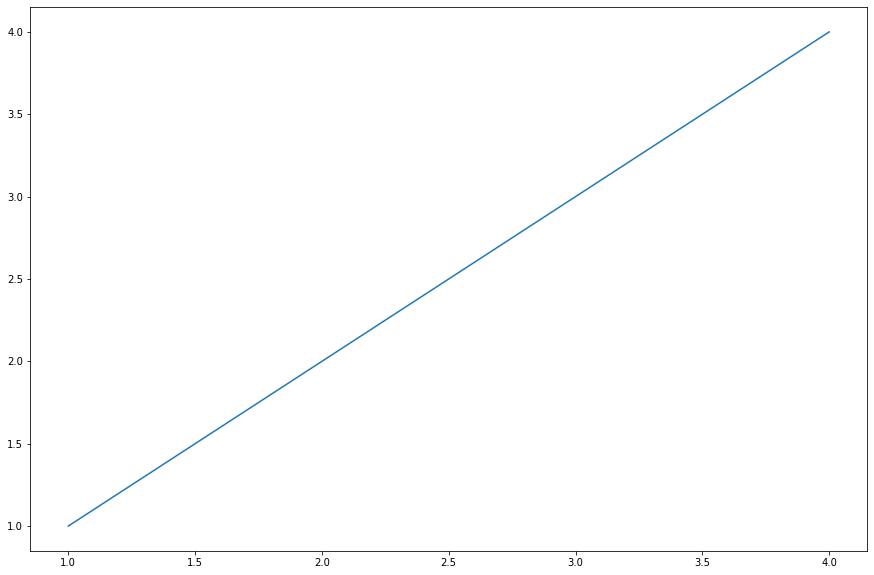

In [2]:
plt.figure(figsize = (15,10))
sns.lineplot(x=[1,2,3,4], y=[1,2,3,4])
plt.show()